# *Working with Date and Time in Python* 

This chapter takes a practical and intuitive approach to an intimidating topic. You will learn how to deal with the complexity of dates and time in your time series data. The chapter illustrates practical use cases for handling time zones, custom holidays, and business days, working with UTC (Universal
Time Coordinated).

Python has several built-in modules for working with date and time, such as the datetime, time, calendar, and zoneinfo modules. Additionally, there are other popular libraries in Python that further extend the capability to work with and manipulate date and time, such as dateutil, pytz, and arrow, to name a few.
You will be introduced to the **datetime** module in this chapter but then transition to use pandas for enhanced and more complex date and time manipulation, and generate time-series DataFrames with a sequence of DatetimeIndex. In addition, the pandas library contains several date-specific and time-specific classes that inherit from the aforementioned Python modules. In other words, you will not need to import additional date/time Python libraries.

The pandas library offers a more straightforward, intuitive, and powerful interface to handle most of your date and time manipulation needs without importing additional modules. When using pandas, you will appreciate having a library that contains everything you need to work with time-series
data and can easily handle many challenging tasks.

Here is the list of the recipes that we will cover in this chapter:

* Working with `DatetimeIndex`
* Providing a format argument to DateTime
* Working with time deltas
* Converting DateTime with time zone information
* Working with date offsets
* Working with custom business days

# Technical Requirements 

In this chapter and going forward, we will extensively use pandas 2.0.1 (released on April
23, 2023). This applies to all the recipes in this chapter.
Load these libraries in advance, since you will be using them throughout the chapter:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

You will use dt, np, and pd aliases going forward.

In [3]:
pd.__version__

'1.4.2'

# Recipe 1: Working with `DatetimeIndex`
In this recipe, you will explore Python's datetime module and learn about the Timestamp and DatetimeIndex classes and the relationship between them.

By the end of this recipe, you will appreciate pandas' rich set of date functionality to
handle almost any representation of date/time in your data. Additionally, you will learn
how to use different functions in pandas to convert date-like objects to a DatetimeIndex.

In [4]:
dt.datetime

datetime.datetime

To understand the relationship between Python's datetime.datetime class and
pandas' Timestamp and DatetimeIndex classes, you will create three different
datetime objects representing the date 2021, 1, 1. You will then compare
these objects to gain a better understanding:

In [5]:
dt1 = dt.datetime(2021,1,1)
dt2 = pd.Timestamp('2021-1-1')
dt3 = pd.to_datetime('2021-1-1')

In [6]:
print(dt1)
print(dt2)
print(dt3)

2021-01-01 00:00:00
2021-01-01 00:00:00
2021-01-01 00:00:00


In [7]:
print(type(dt1))
print(type(dt2))
print(type(dt3))

<class 'datetime.datetime'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


And finally, let's see how they compare:

In [8]:
dt1 == dt2 == dt3

True

In [9]:
dt.datetime(2021,1,1) == pd.to_datetime('2021-1-1')

True

The isinstance() function checks if the object (first argument) is an instance or subclass of classinfo class (second argument).

In [11]:
isinstance(dt2, dt.datetime)

True

In [12]:
isinstance(dt2, pd.Timestamp)

True

In [13]:
isinstance(dt1, pd.Timestamp)

False

In [14]:
isinstance(pd.DatetimeIndex, dt.datetime)

False

You can see from the preceding code that pandas' Timestamp object is equivalent
to Python's Datetime object:

The issubclass() function checks if the class argument (first argument) is a subclass of classinfo class (second argument).



In [15]:
issubclass(pd.Timestamp, dt.datetime)

True

Note that dt2 is an instance of pandas.Timestamp class, and the Timestamp
class is a subclass of Python's dt.datetime class (but not vice versa).

When you used the pandas.to_datetime() function, it returned
a Timestamp object. Now, use pandas.to_datetime() on a list and examine
the outcome:

In [16]:
dates = ['2021-1-1', '2021-1-2']
pd_dates = pd.to_datetime(dates)
print(pd_dates)
print(type(pd_dates))

DatetimeIndex(['2021-01-01', '2021-01-02'], dtype='datetime64[ns]', freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [17]:
isinstance(pd_dates[0], pd.Timestamp)

True

In [18]:
print(pd_dates[0])
print(type(pd_dates[0]))

2021-01-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


From the preceding output, you can infer a relationship between the two classes:
DatetimeIndex and Timestamp. A DatetimeIndex is a sequence (list) of
Timestamp objects.

Now that you know how to create a DatetimeIndex using the pandas.to_
datetime() function, let's further expand on this and see what else you can do
with the function. For example, you will see how simple it is to convert different
datetime representations, including strings, integers, lists, pandas series, or other
datetime objects, into a DatetimeIndex.

Let's create a dates list:

In [20]:
dates = ['2021-01-01', # date str format %Y-%m-%d  #
         '2/1/2021',  # date str format %m/%d/%Y
         '03-01-2021', # date  str format %m-%d-%Y
         'April 1, 2021', # date  str format %B %d, %Y
         '20210501', # date str format %Y%m%d
          np.datetime64('2021-07-01'), # numpy datetime64
          dt.datetime(2021, 8, 1), # python datetime
          pd.Timestamp(2021,9,1) # pandas Timestamp
          ]

In [21]:
parsed_dates = pd.to_datetime(dates,infer_datetime_format=True,errors='coerce')

print(parsed_dates) #(Learn more about NaT)

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)


You could have used the DatetimeIndex
constructor directly, as follows:

In [22]:
pd.DatetimeIndex(dates)

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)

In [23]:
pd.DatetimeIndex(dates) == parsed_dates

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [25]:
parsed_dates = pd.DatetimeIndex(dates)
parsed_dates

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)

The DatetimeIndex object gives access to many useful properties and methods
to extract additional date and time properties. As an example, you can extract
day_name, month, year, days_in_month, quarter, is_quarter_start,
is_leap_year, is_month_start, is_month_end, and is_year_start.
The following code shows how this can be done:

In [27]:
print(f'Name of Day : {parsed_dates.day_name()}')
print(f'Month : {parsed_dates.month}')
print(f'Year : {parsed_dates.year}')
print(f'Days in Month : {parsed_dates.days_in_month}')
print(f'Quarter {parsed_dates.quarter}')
print(f'Quarter Start : {parsed_dates.is_quarter_start}')
print(f'Leap Year : {parsed_dates.is_leap_year}')
print(f'Month Start : {parsed_dates.is_month_start}')
print(f'Month End : {parsed_dates.is_month_end}')
print(f'Year Start : {parsed_dates.is_year_start}')

Name of Day : Index(['Friday', 'Monday', 'Monday', 'Thursday', 'Saturday', 'Thursday',
       'Sunday', 'Wednesday'],
      dtype='object')
Month : Int64Index([1, 2, 3, 4, 5, 7, 8, 9], dtype='int64')
Year : Int64Index([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021], dtype='int64')
Days in Month : Int64Index([31, 28, 31, 30, 31, 31, 31, 30], dtype='int64')
Quarter Int64Index([1, 1, 1, 2, 2, 3, 3, 3], dtype='int64')
Quarter Start : [ True False False  True False  True False False]
Leap Year : [False False False False False False False False]
Month Start : [ True  True  True  True  True  True  True  True]
Month End : [False False False False False False False False]
Year Start : [ True False False False False False False False]


## How it works

The to_datetime function contains the errors parameter. In the previous example,
you specify errors='coerce' which instructs pandas to set any value it could not
parse as NaT indicating a missing value.

The errors parameter in to_datetime can take one of the three valid string options:
* raise, which means it will raise an exception (error out).
* coerce will not cause it to raise an exception. Instead, it will just replace pd.NaT,
indicating a missing datetime value.
* ignore will also not cause it to raise an exception. Instead, it will just pass in the
original value.

Here is an example using the ignore value:

In [28]:
example = pd.to_datetime(['something 2021', 'Jan 1, 2021'], errors='ignore')
example

Index(['something 2021', 'Jan 1, 2021'], dtype='object')

In [29]:
len(example)

2

In [30]:
type(example)

pandas.core.indexes.base.Index

## There is more

An alternate way to generate a of DatetimeIndex is with the **pandas.date_
range()** function. The following code provides a starting date and the number of
periods to generate and specifies a daily frequency with D:

In [31]:
pd.date_range(start='2021-01-01', periods=3, freq='D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D')

In [33]:
pd.date_range(start='2021-01-01',
               end='2021-01-03',
               freq='D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D')

pandas.date_range() requires at least three of the four parameters to be provided –
**start, end, periods, and freq**. If you do not provide enough information, you will
get a **ValueError** exception with the following message:

In [155]:
# Example of error

#pd.date_range(start='2021-01-01',
#                freq='D')

Note, the pd.date_range() function can work with a minimum of two parameters
if the information is sufficient to generate equally spaced time points and infer the missing
parameters
With start and periods, pandas has enough information to construct the date
sequence and default to daily frequency.

In [34]:
pd.date_range(start='2021-01-01',
               periods=3)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D')

# See Also(Optional)

To learn more about pandas' to_datetime() function and the DatetimeIndex class,
please check out these resources:
* pandas.DatetimeIndex documentation: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
* pandas.to_datetime documentation: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

# Recipe 2: Providing a format argument to DateTime

When working with datasets extracted from different data sources, you may encounter
date columns stored in string format, whether from files or databases. In the previous
recipe, Working with **DatetimeIndex**, you explored the pandas.to_datetime()
function that can parse various date formats with minimal input. However, you will want
more granular control to ensure that the date is parsed correctly. For example, you will
now be introduced to the **strptime** and **strftime** methods and see how you can
specify formatting in **pandas.to_datetime()** to handle different date formats.

In this recipe, you will learn how to parse strings that represent dates to a datetime
or date object (an instance of the class datetime.datetime or datetime.date).

Python's datetime module contains the **strptime()** method to create datetime
or date from a string that contains a date. You will first explore how you can do this in
Python and then extend this to pandas:

In [35]:
dt.datetime.strptime('1/1/2022', '%m/%d/%Y')

datetime.datetime(2022, 1, 1, 0, 0)

Note that the output is a datetime object, representing the year, month, day, hour,
and minute. You can specify only the date representation, as follows:

In [36]:
dt.datetime.strptime('1/1/2022', '%m/%d/%Y').date()

datetime.date(2022, 1, 1)

In [37]:
dt.datetime.strptime('1 January, 2022', '%d %B, %Y').date()

datetime.date(2022, 1, 1)

In [38]:
dt.datetime.strptime('1-Jan-2022', '%d-%b-%Y').date()

datetime.date(2022, 1, 1)

In [39]:
dt.datetime.strptime('Saturday, January 1, 2022', '%A, %B %d, %Y').date()

datetime.date(2022, 1, 1)

In [40]:
dt_1 = dt.datetime.strptime('1/1/2022', '%m/%d/%Y')
dt_1.__str__()
str(dt_1)

'2022-01-01 00:00:00'

In [41]:
print(dt_1)

2022-01-01 00:00:00


Using `pandas.to_datetime()`

Now, let's compare what you did using the **datetime.strptime** method using
**pandas.to_datetime** method:

In [42]:
pd.to_datetime('1/1/2022', format='%m/%d/%Y')

Timestamp('2022-01-01 00:00:00')

In [43]:
pd.to_datetime('1 January, 2022', format='%d %B, %Y')

Timestamp('2022-01-01 00:00:00')

In [44]:
pd.to_datetime('1-Jan-2022', format='%d-%b-%Y')

Timestamp('2022-01-01 00:00:00')

In [45]:
pd.to_datetime('Saturday, January 1, 2022', format='%A, %B %d, %Y')

Timestamp('2022-01-01 00:00:00')

In [46]:
dt_2 = pd.to_datetime('1/1/2022', format='%m/%d/%Y')
print(dt_2)

2022-01-01 00:00:00


In [47]:
pd.to_datetime('1-Jan-2022')

Timestamp('2022-01-01 00:00:00')

In [48]:
pd.to_datetime('Saturday, January 1, 2022')

Timestamp('2022-01-01 00:00:00')

In [49]:
str(dt_2)
dt_2.__str__()

'2022-01-01 00:00:00'

In [50]:
dt_1 == dt_2

True

In [51]:
dt_1.date()

datetime.date(2022, 1, 1)

In [174]:
dt_2.date()

datetime.date(2022, 1, 1)

In [52]:
type(dt_1)
type(dt_2)

pandas._libs.tslibs.timestamps.Timestamp

In [53]:
isinstance(pd.DatetimeIndex, pd.Timestamp)

False

In [54]:
isinstance(dt_1, dt.datetime)

True

In [55]:
isinstance(dt_2, dt.datetime)

True

In [56]:
isinstance(dt_1, pd.Timestamp)

False

In [57]:
isinstance(dt_2, pd.Timestamp)

True

In [58]:
issubclass(pd.Timestamp, dt.datetime)

True

## How it works…
In this recipe, you used Python's datetime.datetime and pandas.to_datetime
methods to parse dates in string formats. When using datetime, you had to use the
dt.datetime.strptime() function to specify the date format representation in the
string using format codes (example %d, %B, and %Y).
For example, in datetime.strptime('1 January, 2022', '%d %B, %Y'),
you provided the %d, %B, and %Y format codes in the exact order and spacing to represent
the formatting provided in the string. Let's break this down:

* %d indicates that the first value is a zero-padded digit representing the day of the
month, followed by a space to display spacing between the digit and the next object.
* %B is used to indicate that the second value represents the month's full name. Note
that this was followed by a comma (,) to describe the exact format in the string, for
example "January,". Therefore, it is crucial to match the format in the strings
you are parsing to include any commas, hyphens, backslashes, spaces, or whichever
separator characters are used.
* To adhere to the string format, there is a space after the comma (,), followed by %Y
to reflect the last value represents a four-digit year.

Recall that you used pandas.to_datetime() to parse the same string objects as
with dt.datetime.strptime(). The biggest difference is that the pandas function
can accurately parse the strings without explicitly providing an argument to the format
parameter. That is one of many advantages of using pandas for time-series analysis,
especially when handling complex date and datetime scenarios

## There is more

Now you know how to use pandas.to_datetime() to parse string objects to
datetime. So, let's see how you can apply this knowledge to transform a DataFrame
column that contains date information in string format to a datetime data type.

In the following code, you will create a small DataFrame:

In [59]:
df = pd.DataFrame(
        {'Date': ['January 1, 2022', 'January 2, 2022', 'January 3, 2022'],
         'Sales': [23000, 19020, 21000]}
            )
df

,Date,Sales
0,"January 1, 2022",23000
1,"January 2, 2022",19020
2,"January 3, 2022",21000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3 non-null      object
 1   Sales   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


To update the DataFrame to include a DatetimeIndex, you will parse the Date column to
datetime and then assign it as an index to the DataFrame:

In [184]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2022-01-01 to 2022-01-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   3 non-null      int64
dtypes: int64(1)
memory usage: 48.0 bytes


Note how the index is now of the DatetimeIndex type, and there is only one column in
the DataFrame (Sales), since Date is now an index.

Before Diving into further recipes , Let's have a brief idea about **UTC**

Many databases, applications, and systems store dates and time in numeric format,
making it mathematically easier to work with, convert, increment, decrement, and so on.
**UTC**, which stands for Universal
Time Coordinated , is a clear choice when building applications used globally,
making it easier to store dates and timestamps in a standardized format. This makes it
easier to work with dates and time without worrying about daylight saving or different
time zones around the globe. UTC is the standard international time used in aviation
systems, weather forecast systems, the International Space Station, and so on.

# Recipe 3: Working with Time Deltas

When working with time-series data, you may need to perform some calculations on
your datetime columns, such as adding or subtracting. Examples can include adding 30
days to purchase datetime to determine when the return policy expires for a product
or when a warranty ends. For example, the Timedelta class makes it possible to derive
new datetime objects by adding or subtracting at different ranges or increments, such as
seconds, daily, and weekly. This includes time zone-aware calculations.

In this recipe, you will work with hypothetical sales data for a retail store. You will
generate the sales DataFrame, which will contain items purchased from the store and the
purchase date. You will then explore different scenarios using the **Timedelta** class and
the **to_timedelta()** function:

You start by creating a DataFrame with two columns,
item and purchase_dt, which will be standardized to UTC: 

In [62]:
df = pd.DataFrame(
        {       
        'item': ['item1', 'item2', 'item3', 'item4', 'item5', 'item6'],
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D', tz='UTC') #(tz= time zone)#
        }
)
df

,item,purchase_dt
0,item1,2021-01-01 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00


Add another datetime column to represent the expiration date, which is 30 days
from the purchase date:

In [63]:
df['expiration_dt'] = df['purchase_dt'] + pd.Timedelta(days=30)
df

,item,purchase_dt,expiration_dt
0,item1,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00,2021-02-01 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00,2021-02-02 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00,2021-02-03 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00,2021-02-04 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00,2021-02-05 00:00:00+00:00


Now, assume you are asked to create a special extended date for return, and this one
is set at 35 days, 12 hours, and 30 minutes from the purchase date:

In [64]:
df['extended_dt'] = df['purchase_dt'] +\
                pd.Timedelta('35 days 12 hours 30 minutes')
df

,item,purchase_dt,expiration_dt,extended_dt
0,item1,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,2021-02-05 12:30:00+00:00
1,item2,2021-01-02 00:00:00+00:00,2021-02-01 00:00:00+00:00,2021-02-06 12:30:00+00:00
2,item3,2021-01-03 00:00:00+00:00,2021-02-02 00:00:00+00:00,2021-02-07 12:30:00+00:00
3,item4,2021-01-04 00:00:00+00:00,2021-02-03 00:00:00+00:00,2021-02-08 12:30:00+00:00
4,item5,2021-01-05 00:00:00+00:00,2021-02-04 00:00:00+00:00,2021-02-09 12:30:00+00:00
5,item6,2021-01-06 00:00:00+00:00,2021-02-05 00:00:00+00:00,2021-02-10 12:30:00+00:00


Finally, you can calculate the delta between the extended and original expiration
dates. Since they are both datetime data types, you can achieve this with a simple
subtraction between the two columns:

In [65]:
df['exp_ext_diff'] = (
         df['extended_dt'] - df['expiration_dt']
        )
df

,item,purchase_dt,expiration_dt,extended_dt,exp_ext_diff
0,item1,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,2021-02-05 12:30:00+00:00,5 days 12:30:00
1,item2,2021-01-02 00:00:00+00:00,2021-02-01 00:00:00+00:00,2021-02-06 12:30:00+00:00,5 days 12:30:00
2,item3,2021-01-03 00:00:00+00:00,2021-02-02 00:00:00+00:00,2021-02-07 12:30:00+00:00,5 days 12:30:00
3,item4,2021-01-04 00:00:00+00:00,2021-02-03 00:00:00+00:00,2021-02-08 12:30:00+00:00,5 days 12:30:00
4,item5,2021-01-05 00:00:00+00:00,2021-02-04 00:00:00+00:00,2021-02-09 12:30:00+00:00,5 days 12:30:00
5,item6,2021-01-06 00:00:00+00:00,2021-02-05 00:00:00+00:00,2021-02-10 12:30:00+00:00,5 days 12:30:00


### Python datetime.timedelta vs pd.Timedelta

Time deltas can be handy for capturing the difference between two date or time objects.
In pandas, the **pandas.Timedelta** class is equivalent to Python's **datetime.timedelta** class and behaves very similarly. However, the advantage of pandas is
that it includes a wide range of classes and functions for working with time-series data.
These built-in functions within pandas, in general, are simpler and more efficient when
working with DataFrames. Let's try this quick experiment to demonstrate how pandas'
Timedelta class is a subclass of Python's timedelta class:

In [189]:
dt.timedelta(days=1)

datetime.timedelta(days=1)

In [190]:
pd.Timedelta(days=1) == dt.timedelta(days=1)

True

In [191]:
dt_1 = pd.Timedelta(days=1)
dt_2 = dt.timedelta(days=1)
isinstance(pd.Timedelta, dt.timedelta)

False

In [192]:
isinstance(dt_1, dt.timedelta)

True

In [193]:
isinstance(dt_1, pd.Timedelta)

True

In [194]:
issubclass(pd.Timedelta, dt.timedelta)

True

In [195]:
issubclass(dt.timedelta, pd.Timedelta)

False

Python's datetime.timedelta class accepts integer values for these parameters –
days, seconds, microseconds, milliseconds, minutes, hours, and
weeks. On the other hand, pandas.Timedelta takes both integers and strings,
as demonstrated in the following snippet:

In [196]:
pd.Timedelta(days = 1, hours = 12)

Timedelta('1 days 12:00:00')

In [197]:
pd.Timedelta('10 U')

Timedelta('0 days 00:00:00.000010')

In [198]:
pd.Timedelta(days=1, hours=12, minutes=55)

Timedelta('1 days 12:55:00')

In [199]:
pd.Timedelta('1 day 12 hours 55 minutes')

Timedelta('1 days 12:55:00')

In [200]:
pd.Timedelta('1D 12H 55T')

Timedelta('1 days 12:55:00')

In [201]:
2*dt_1

Timedelta('2 days 00:00:00')

Once you have defined your Timedelta object, you can use it to make calculations on
date, time, or datetime objects:

In [202]:
week_td = pd.Timedelta('1W')
pd.to_datetime('1 JAN 2022') + week_td

Timestamp('2022-01-08 00:00:00')

In [203]:
pd.to_datetime('1 JAN 2022') + 2*week_td

Timestamp('2022-01-15 00:00:00')

## There is more

In [204]:
df = pd.DataFrame(
        {       
        'item': ['item1', 'item2', 'item3', 'item4', 'item5', 'item6'],
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D', tz='UTC')
        }
)
df

,item,purchase_dt
0,item1,2021-01-01 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   item         6 non-null      object             
 1   purchase_dt  6 non-null      datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 224.0+ bytes


Now, you will add a new
column that contains the Timedelta object (1 week) and then use that column to add
and subtract from the purchased_dt column:

In [206]:
df['1 week'] = pd.Timedelta('1W')

In [207]:
df

,item,purchase_dt,1 week
0,item1,2021-01-01 00:00:00+00:00,7 days
1,item2,2021-01-02 00:00:00+00:00,7 days
2,item3,2021-01-03 00:00:00+00:00,7 days
3,item4,2021-01-04 00:00:00+00:00,7 days
4,item5,2021-01-05 00:00:00+00:00,7 days
5,item6,2021-01-06 00:00:00+00:00,7 days


In [208]:
df['1_week_more'] = df['purchase_dt'] + df['1 week']
df['1_week_less'] = df['purchase_dt'] - df['1 week']
df

,item,purchase_dt,1 week,1_week_more,1_week_less
0,item1,2021-01-01 00:00:00+00:00,7 days,2021-01-08 00:00:00+00:00,2020-12-25 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00,7 days,2021-01-09 00:00:00+00:00,2020-12-26 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00,7 days,2021-01-10 00:00:00+00:00,2020-12-27 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00,7 days,2021-01-11 00:00:00+00:00,2020-12-28 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00,7 days,2021-01-12 00:00:00+00:00,2020-12-29 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00,7 days,2021-01-13 00:00:00+00:00,2020-12-30 00:00:00+00:00


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   item         6 non-null      object             
 1   purchase_dt  6 non-null      datetime64[ns, UTC]
 2   1 week       6 non-null      timedelta64[ns]    
 3   1_week_more  6 non-null      datetime64[ns, UTC]
 4   1_week_less  6 non-null      datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](3), object(1), timedelta64[ns](1)
memory usage: 368.0+ bytes


Similarly, you have an option to generate TimdedeltaIndex with a fixed frequency
using the pandas.timedelta_range() function, which takes similar parameters
as the pandas.date_range() function. Here is a quick example:

In [210]:
pd.timedelta_range('1W 2 days', periods=5)

TimedeltaIndex(['9 days', '10 days', '11 days', '12 days', '13 days'], dtype='timedelta64[ns]', freq='D')

In [211]:
df = pd.DataFrame(
        {       
        'item': ['item1', 'item2', 'item3', 'item4', 'item5'],
        'purchase_dt': pd.date_range('2021-01-01', periods=5, freq='D', tz='UTC'),
        'time_deltas': pd.timedelta_range('1W 2 days 6 hours', periods=5)
        }

)
df

,item,purchase_dt,time_deltas
0,item1,2021-01-01 00:00:00+00:00,9 days 06:00:00
1,item2,2021-01-02 00:00:00+00:00,10 days 06:00:00
2,item3,2021-01-03 00:00:00+00:00,11 days 06:00:00
3,item4,2021-01-04 00:00:00+00:00,12 days 06:00:00
4,item5,2021-01-05 00:00:00+00:00,13 days 06:00:00


### See also(Optional)
* To learn more about the pandas.timedelta_range() function, please refer
to the official documentation here: https://pandas.pydata.org/docs/reference/api/pandas.timedelta_range.html.
* To learn more about the pandas.Timedelta class, please visit the official
documentation here: https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html.

# Recipe 4: Converting Datetime with TimeZone information 

When working with time-series data that requires attention to different time zones, things
can get out of hand and become more complicated. For example, when developing data
pipelines, building a data warehouse, or integrating data between systems, dealing with
time zones requires attention and consensus amongst the different stakeholders in the
project. For example, in Python, there are several libraries and modules dedicated to
working with time zone conversion; these include pytz, dateutil, and zoneinfo,
to name a few.

In this recipe, you will work with a hypothetical scenario – a small dataset that you
will generate to represent website visits at different time intervals from various
locations worldwide. The data will be standardized to UTC, and you will work
with time-zone conversions.

In [212]:
df = pd.DataFrame(
        {       
        'Location': ['Los Angeles', 
                     'New York',
                     'Berlin', 
                     'New Delhi', 
                     'Moscow', 
                     'Tokyo', 
                     'Dubai'],
        'tz': ['US/Pacific', 
               'US/Eastern', 
               'Europe/Berlin', 
               'Asia/Kolkata', 
               'Europe/Moscow', 
               'Asia/Tokyo',
               'Asia/Dubai'],
        'visit_dt': pd.date_range(start='22:00',periods=7, freq='45min'),
        }).set_index('visit_dt')

In [213]:
df

,Location,tz
visit_dt,,
2023-05-07 22:00:00,Los Angeles,US/Pacific
2023-05-07 22:45:00,New York,US/Eastern
2023-05-07 23:30:00,Berlin,Europe/Berlin
2023-05-08 00:15:00,New Delhi,Asia/Kolkata
2023-05-08 01:00:00,Moscow,Europe/Moscow
2023-05-08 01:45:00,Tokyo,Asia/Tokyo
2023-05-08 02:30:00,Dubai,Asia/Dubai


Assume that you need to convert this DataFrame to be in the same time zone as
the company's headquarters in Tokyo. You can do this easily using DataFrame.
tz_convert() against the DataFrame, but you will get a TypeError exception
if you do this. That is because your time-series DataFrame is not time zone-aware.
So, you need to localize it first using tz_localize() to make it time-zone
aware. In this case, you will localize it to UTC:

In [214]:
df = df.tz_localize('UTC')
df

,Location,tz
visit_dt,,
2023-05-07 22:00:00+00:00,Los Angeles,US/Pacific
2023-05-07 22:45:00+00:00,New York,US/Eastern
2023-05-07 23:30:00+00:00,Berlin,Europe/Berlin
2023-05-08 00:15:00+00:00,New Delhi,Asia/Kolkata
2023-05-08 01:00:00+00:00,Moscow,Europe/Moscow
2023-05-08 01:45:00+00:00,Tokyo,Asia/Tokyo
2023-05-08 02:30:00+00:00,Dubai,Asia/Dubai


In [215]:
df_hq = df.tz_convert('Asia/Tokyo')
df_hq

,Location,tz
visit_dt,,
2023-05-08 07:00:00+09:00,Los Angeles,US/Pacific
2023-05-08 07:45:00+09:00,New York,US/Eastern
2023-05-08 08:30:00+09:00,Berlin,Europe/Berlin
2023-05-08 09:15:00+09:00,New Delhi,Asia/Kolkata
2023-05-08 10:00:00+09:00,Moscow,Europe/Moscow
2023-05-08 10:45:00+09:00,Tokyo,Asia/Tokyo
2023-05-08 11:30:00+09:00,Dubai,Asia/Dubai


Note that you were able to access the tz_localize() and tz_convert()
methods because the DataFrame had an index of type DatetimeIndex.
If that was not the case, you would get a TypeError exception with the
following message:

#### TypeError: index is not a valid DatetimeIndex or PeriodIndex

Now, you will localize each row to the appropriate time zone. You will add a new
column reflecting the time zone, based on the location of the user that accessed the
website. You will leverage the tz column to accomplish this

In [216]:
df['local_dt'] = df.index
df['local_dt'] = df.apply(lambda x: pd.Timestamp.tz_convert(x['local_dt'], x['tz']), axis=1)
df

,Location,tz,local_dt
visit_dt,,,
2023-05-07 22:00:00+00:00,Los Angeles,US/Pacific,2023-05-07 15:00:00-07:00
2023-05-07 22:45:00+00:00,New York,US/Eastern,2023-05-07 18:45:00-04:00
2023-05-07 23:30:00+00:00,Berlin,Europe/Berlin,2023-05-08 01:30:00+02:00
2023-05-08 00:15:00+00:00,New Delhi,Asia/Kolkata,2023-05-08 05:45:00+05:30
2023-05-08 01:00:00+00:00,Moscow,Europe/Moscow,2023-05-08 04:00:00+03:00
2023-05-08 01:45:00+00:00,Tokyo,Asia/Tokyo,2023-05-08 10:45:00+09:00
2023-05-08 02:30:00+00:00,Dubai,Asia/Dubai,2023-05-08 06:30:00+04:00


You may wonder, what if you did not have a tz column? Where would you find the right
tz string? Well, these are called Time Zone (TZ) database names. These are standard
names, and you can find a subset of these in the Python documentation, or for a more
comprehensive list, you can visit this link: https://en.wikipedia.org/wiki/List_of_tz_database_time_zones.

In [217]:
df.apply(lambda x: pd.Timestamp.tz_convert(x['local_dt'], x['tz']), axis=1)

visit_dt
2023-05-07 22:00:00+00:00    2023-05-07 15:00:00-07:00
2023-05-07 22:45:00+00:00    2023-05-07 18:45:00-04:00
2023-05-07 23:30:00+00:00    2023-05-08 01:30:00+02:00
2023-05-08 00:15:00+00:00    2023-05-08 05:45:00+05:30
2023-05-08 01:00:00+00:00    2023-05-08 04:00:00+03:00
2023-05-08 01:45:00+00:00    2023-05-08 10:45:00+09:00
2023-05-08 02:30:00+00:00    2023-05-08 06:30:00+04:00
dtype: object

In [218]:
pd.to_datetime(df['local_dt'], utc=True)

visit_dt
2023-05-07 22:00:00+00:00   2023-05-07 22:00:00+00:00
2023-05-07 22:45:00+00:00   2023-05-07 22:45:00+00:00
2023-05-07 23:30:00+00:00   2023-05-07 23:30:00+00:00
2023-05-08 00:15:00+00:00   2023-05-08 00:15:00+00:00
2023-05-08 01:00:00+00:00   2023-05-08 01:00:00+00:00
2023-05-08 01:45:00+00:00   2023-05-08 01:45:00+00:00
2023-05-08 02:30:00+00:00   2023-05-08 02:30:00+00:00
Name: local_dt, dtype: datetime64[ns, UTC]

## There is More

Looking at the DataFrame in df_hq, it is hard to tell immediately whether the time
was in the morning (AM) or evening (PM). You can format datetime using strftime
(which we discussed in the Providing a format argument to DateTime recipe).
You will construct the same DataFrame, localize it to UTC, then convert it to the
headquarters' time zone, and apply the new format:

In [219]:
df = pd.DataFrame(
        {       
        'Location': ['Los Angeles', 
                     'New York',
                     'Berlin', 
                     'New Delhi', 
                     'Moscow', 
                     'Tokyo', 
                     'Dubai'],
        'tz': ['US/Pacific', 
               'US/Eastern', 
               'Europe/Berlin', 
               'Asia/Kolkata', 
               'Europe/Moscow', 
               'Asia/Tokyo',
               'Asia/Dubai'],
        'visit_dt': pd.date_range(start='22:00',periods=7, freq='45min'),
        }).set_index('visit_dt').tz_localize('UTC').tz_convert('Asia/Tokyo')
df

,Location,tz
visit_dt,,
2023-05-08 07:00:00+09:00,Los Angeles,US/Pacific
2023-05-08 07:45:00+09:00,New York,US/Eastern
2023-05-08 08:30:00+09:00,Berlin,Europe/Berlin
2023-05-08 09:15:00+09:00,New Delhi,Asia/Kolkata
2023-05-08 10:00:00+09:00,Moscow,Europe/Moscow
2023-05-08 10:45:00+09:00,Tokyo,Asia/Tokyo
2023-05-08 11:30:00+09:00,Dubai,Asia/Dubai


In [220]:
df.index = df.index.strftime('%Y-%m-%d %H:%M %p')
df

,Location,tz
visit_dt,,
2023-05-08 07:00 AM,Los Angeles,US/Pacific
2023-05-08 07:45 AM,New York,US/Eastern
2023-05-08 08:30 AM,Berlin,Europe/Berlin
2023-05-08 09:15 AM,New Delhi,Asia/Kolkata
2023-05-08 10:00 AM,Moscow,Europe/Moscow
2023-05-08 10:45 AM,Tokyo,Asia/Tokyo
2023-05-08 11:30 AM,Dubai,Asia/Dubai


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 2023-05-08 07:00 AM to 2023-05-08 11:30 AM
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  7 non-null      object
 1   tz        7 non-null      object
dtypes: object(2)
memory usage: 168.0+ bytes


## See Also(Optional)
To learn more about tz_convert you can read the official documentation at https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.tz_convert.html and https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.tz_convert.html.

# Recipe 5: Working with Date Offets

When working with time series, it is critical that you learn more about the data you are
working with and how it relates to the problem you are attempting to solve. For example,
when working with manufacturing or sales data, you cannot assume that an organization's
working day is Monday to Friday or whether it uses the standard calendar year or fiscal
year. You should also consider understanding any holiday schedule, annual shutdowns,
and other matters related to the business operation.

This is where offsets can be handy. They can help transform your dates into something
more meaningful and relatable to a business. They can also help correct data entries that
may not be logical.

We will work through a hypothetical example in this recipe and see how to leverage
pandas offsets.

In this recipe, you will generate a time-series DataFrame to represent some daily logs of
production quantity. The company, a US-based firm, would like to analyze data to better
understand production capacity for future forecasting:

In [222]:
df = pd.DataFrame(
        {       
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D'),
        'production' : np.random.randint(4, 20, 6)
        }).set_index('purchase_dt')
df


,production
purchase_dt,
2021-01-01,7
2021-01-02,8
2021-01-03,7
2021-01-04,16
2021-01-05,12
2021-01-06,15


In [223]:
df['day'] = df.index.day_name()
df

,production,day
purchase_dt,,
2021-01-01,7,Friday
2021-01-02,8,Saturday
2021-01-03,7,Sunday
2021-01-04,16,Monday
2021-01-05,12,Tuesday
2021-01-06,15,Wednesday


In [224]:
df.reset_index().groupby(['purchase_dt', 'day']).sum()

,,production
purchase_dt,day,
2021-01-01,Friday,7
2021-01-02,Saturday,8
2021-01-03,Sunday,7
2021-01-04,Monday,16
2021-01-05,Tuesday,12
2021-01-06,Wednesday,15


When working with any data, always understand the business context behind it.
Without domain knowledge or business context, it would be difficult to determine
whether a data point is acceptable or not. In this scenario, the company was
described as a US-based firm, and thus, working days are Monday to Friday. If there
is data on a Saturday or Sunday (the weekend), you should not make assumptions
without validating with the business. You should confirm whether there was any
exception made for production on those specific weekend dates. Also, realize that
January 1 was a holiday. After investigation, it was confirmed that production
did occur due to an emergency exception. The business executives do not want
to account for weekend or holiday work in the forecast. In other words, it was
a one-time non-occurring event that they do not want to model or build
a hypothesis on.

The firm asks you to push the weekend/holiday production numbers to the next
business day instead. Here, you will use pandas.offsets.BDay(), which
represents business days:

In [225]:
type(pd.offsets.BDay(0))

pandas._libs.tslibs.offsets.BusinessDay

In [226]:
df['BusinessDay'] = df.index - pd.offsets.BDay(0)
df['BDay Name'] = df['BusinessDay'].dt.day_name()
df

,production,day,BusinessDay,BDay Name
purchase_dt,,,,
2021-01-01,7,Friday,2021-01-01,Friday
2021-01-02,8,Saturday,2021-01-04,Monday
2021-01-03,7,Sunday,2021-01-04,Monday
2021-01-04,16,Monday,2021-01-04,Monday
2021-01-05,12,Tuesday,2021-01-05,Tuesday
2021-01-06,15,Wednesday,2021-01-06,Wednesday


Let's perform a summary aggregation that adds production numbers by business
days to understand the impact of this change better:

In [227]:
df.groupby(['BusinessDay', 'BDay Name']).sum()

,,production,day
BusinessDay,BDay Name,,
2021-01-01,Friday,7,Friday
2021-01-04,Monday,31,SaturdaySundayMonday
2021-01-05,Tuesday,12,Tuesday
2021-01-06,Wednesday,15,Wednesday


<Axes: xlabel='BusinessDay,BDay Name'>

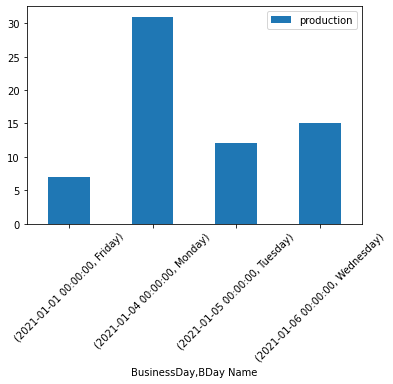

In [228]:
df.groupby(['BusinessDay', 'BDay Name']).sum().plot.bar(rot=45)

Finally, the business has made another request – they would like to track production
monthly (MonthEnd) and quarterly (QuarterEnd). You can use pandas.
offsets again to add two new columns:

In [229]:
df = pd.DataFrame(
        {       
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D'),
        'production' : np.random.randint(4, 20, 6)
        }).set_index('purchase_dt')
df

,production
purchase_dt,
2021-01-01,16
2021-01-02,16
2021-01-03,17
2021-01-04,5
2021-01-05,4
2021-01-06,12


In [230]:
df['QuarterEnd'] = df.index + pd.offsets.QuarterEnd(0)
#df['BDay Name'] = df['BusinessDay'].dt.day_name()
df

,production,QuarterEnd
purchase_dt,,
2021-01-01,16,2021-03-31
2021-01-02,16,2021-03-31
2021-01-03,17,2021-03-31
2021-01-04,5,2021-03-31
2021-01-05,4,2021-03-31
2021-01-06,12,2021-03-31


In [231]:
df['MonthEnd'] = df.index + pd.offsets.MonthEnd(0)
#df['BDay Name'] = df['BusinessDay'].dt.day_name()
df

,production,QuarterEnd,MonthEnd
purchase_dt,,,
2021-01-01,16,2021-03-31,2021-01-31
2021-01-02,16,2021-03-31,2021-01-31
2021-01-03,17,2021-03-31,2021-01-31
2021-01-04,5,2021-03-31,2021-01-31
2021-01-05,4,2021-03-31,2021-01-31
2021-01-06,12,2021-03-31,2021-01-31


In [232]:
df['BusinessDay'] = df.index + pd.offsets.BDay(0)
df

,production,QuarterEnd,MonthEnd,BusinessDay
purchase_dt,,,,
2021-01-01,16,2021-03-31,2021-01-31,2021-01-01
2021-01-02,16,2021-03-31,2021-01-31,2021-01-04
2021-01-03,17,2021-03-31,2021-01-31,2021-01-04
2021-01-04,5,2021-03-31,2021-01-31,2021-01-04
2021-01-05,4,2021-03-31,2021-01-31,2021-01-05
2021-01-06,12,2021-03-31,2021-01-31,2021-01-06


Using date offsets made it possible to increment, decrement, and transform your dates to
a new date range following specific rules. There are several offsets provided by pandas,
each with its own rules, which can be applied to your dataset. Here is a list of the common
offsets available in pandas:

*  BusinessDay or Bday
* MonthEnd
* BusinessMonthEnd or BmonthEnd
* CustomBusinessDay or Cday
* QuarterEnd
* FY253Quarter

Working with date offsets 191
For a more comprehensive list and their descriptions, you can visit the documentation
here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects.

## There is More

Following our example, you may have noticed when using the BusinessDay (BDay)
offset that it did not account for the New Year's Day holiday (January 1). So, what can be
done to account for both the New Year's Day holiday and weekends?
To accomplish this, pandas provides two approaches to handle standard holidays. The first
method is by defining a custom holiday. The second approach (when suitable) uses an
existing holiday offset.
Let's start with an existing offset. For this example, dealing with New Year, you can use the
USFederalHolidayCalendar class, which has standard holidays such as New Year,
Christmas, and other holidays specific to the United States. So, let's see how this works.

In [233]:
from pandas.tseries.holiday import (
    USFederalHolidayCalendar
)

df = pd.DataFrame(
        {       
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D'),
        'production' : np.random.randint(4, 20, 6)
        }).set_index('purchase_dt')
df

,production
purchase_dt,
2021-01-01,17
2021-01-02,15
2021-01-03,7
2021-01-04,6
2021-01-05,5
2021-01-06,6


In [234]:
USFederalHolidayCalendar.rules

[Holiday: New Year's Day (month=1, day=1, observance=<function nearest_workday at 0x000001D3CD40B880>),
 Holiday: Birthday of Martin Luther King, Jr. (month=1, day=1, offset=<DateOffset: weekday=MO(+3)>),
 Holiday: Washington’s Birthday (month=2, day=1, offset=<DateOffset: weekday=MO(+3)>),
 Holiday: Memorial Day (month=5, day=31, offset=<DateOffset: weekday=MO(-1)>),
 Holiday: Juneteenth National Independence Day (month=6, day=19, observance=<function nearest_workday at 0x000001D3CD40B880>),
 Holiday: Independence Day (month=7, day=4, observance=<function nearest_workday at 0x000001D3CD40B880>),
 Holiday: Labor Day (month=9, day=1, offset=<DateOffset: weekday=MO(+1)>),
 Holiday: Columbus Day (month=10, day=1, offset=<DateOffset: weekday=MO(+2)>),
 Holiday: Veterans Day (month=11, day=11, observance=<function nearest_workday at 0x000001D3CD40B880>),
 Holiday: Thanksgiving Day (month=11, day=1, offset=<DateOffset: weekday=TH(+4)>),
 Holiday: Christmas Day (month=12, day=25, observance=<

To apply these rules, you will use the CustomerBusinessDay or CDay offset:

In [235]:
df['USFederalHolidays'] = df.index + pd.offsets.CDay(calendar=USFederalHolidayCalendar())
df

,production,USFederalHolidays
purchase_dt,,
2021-01-01,17,2021-01-04
2021-01-02,15,2021-01-04
2021-01-03,7,2021-01-04
2021-01-04,6,2021-01-05
2021-01-05,5,2021-01-06
2021-01-06,6,2021-01-07


The custom holiday option will behave in the same way. You will need to import the
Holiday class and the nearest_workday function. You will use the Holiday class to
define your specific holidays. In this case, you will determine the New Year's rule:

In [236]:
from pandas.tseries.holiday import (
    Holiday,
    nearest_workday
)

In [237]:
Holiday

pandas.tseries.holiday.Holiday

In [238]:
newyears = Holiday("New Years", 
                   month=1, 
                   day=1, 
                   observance=nearest_workday)
newyears

Holiday: New Years (month=1, day=1, observance=<function nearest_workday at 0x000001D3CD40B880>)

In [239]:
df['NewYearsHoliday'] = df.index + pd.offsets.CDay(calendar=newyears)
df

,production,USFederalHolidays,NewYearsHoliday
purchase_dt,,,
2021-01-01,17,2021-01-04,2021-01-04
2021-01-02,15,2021-01-04,2021-01-04
2021-01-03,7,2021-01-04,2021-01-04
2021-01-04,6,2021-01-05,2021-01-05
2021-01-05,5,2021-01-06,2021-01-06
2021-01-06,6,2021-01-07,2021-01-07


In [240]:
nearest_workday(pd.to_datetime('2021-1-3'))

Timestamp('2021-01-04 00:00:00')

As illustrated, the function mainly determines whether the day is a weekday or not, and
based on that, it will either use the day before (if it falls on a Saturday) or the day after
(if it falls on a Sunday). There are other rules available as well as nearest_workday,
including the following:

* Sunday_to_Monday
* Next_Monday_or_Tuesday
* Previous_Friday
* Next_monday

## See also(Optional)
For more insight regarding pandas.tseries.holiday, you can view the actual code,
which highlights all the classes and functions and can serve as an excellent reference,
at https://github.com/pandas-dev/pandas/blob/master/pandas/tseries/holiday.py.

# Recipe 7: Working with custom business days

Companies have different working days worldwide, influenced by the region or territory
they belong to. For example, when working with time-series data and depending on the
analysis you need to make, knowing whether certain transactions fall on a workday
or weekend can make a difference. For example, suppose you are doing anomaly
detection, and you know that certain types of activities can only be done during
working hours. In that case, any activities beyond these boundaries may trigger
some further analysis.


In this recipe, you will see how you can customize an offset to fit your requirements when
doing an analysis that depends on defined business days and non-business days.

In this recipe, you will create custom business days and holidays for a company
headquartered in Dubai, UAE. In the UAE, the working week is from Sunday to Thursday,
whereas Friday to Saturday is a 2-day weekend. Additionally, their National Day
(a holiday) is on December 2 each year:

You will start by defining the workdays and holidays for
the UAE:

In [241]:
dubai_uae_workdays = "Sun Mon Tue Wed Thu"

# UAE national day
nationalDay = [pd.to_datetime('2021-12-2')]


dubai_uae_bday = pd.offsets.CDay(
    holidays=nationalDay,
    weekmask=dubai_uae_workdays,
)

In [242]:
dubai_uae_bday.holidays

(numpy.datetime64('2021-12-02'),)

In [243]:
dubai_uae_bday.weekmask

'Sun Mon Tue Wed Thu'

In [244]:
df = pd.DataFrame({'Date': pd.date_range('12-1-2021', periods=10, freq=dubai_uae_bday )})
df

,Date
0,2021-12-01
1,2021-12-05
2,2021-12-06
3,2021-12-07
4,2021-12-08
5,2021-12-09
6,2021-12-12
7,2021-12-13
8,2021-12-14
9,2021-12-15


In [245]:
df['Day_name'] = df.Date.dt.day_name()
df

,Date,Day_name
0,2021-12-01,Wednesday
1,2021-12-05,Sunday
2,2021-12-06,Monday
3,2021-12-07,Tuesday
4,2021-12-08,Wednesday
5,2021-12-09,Thursday
6,2021-12-12,Sunday
7,2021-12-13,Monday
8,2021-12-14,Tuesday
9,2021-12-15,Wednesday


## How it Works

This recipe builds on the Working with date offsets recipe but focuses on customizing
offsets. pandas provides several offsets that can take a custom calendar, holiday, and
weekmask. These include the following:

* CustomBusinessDay or Cday
* CustomBusinessMonthEnd or CBMonthEnd
* CustomBusinessMonthBegin or CBMonthBegin
* CustomBusinessHour

They behave like any other offset; the only difference is that they allow you to create your
own rules.

### Custom Business Hours

Let's extend the previous example and add custom business hours to the DataFrame.
This will be another custom offset that you can use in a similar way to Cday:

In [246]:
b_hours = pd.offsets.BusinessHour()
b_hours

<BusinessHour: BH=09:00-17:00>

In [247]:
cust_hours = pd.offsets.CustomBusinessHour(
    start="8:30",
    end="15:30",
    holidays=nationalDay,
    weekmask=dubai_uae_workdays)

In [248]:
df['Date'] =\
      df['Date'].dt.tz_localize('UTC').dt.tz_convert('Asia/Dubai')

In [249]:
df

,Date,Day_name
0,2021-12-01 04:00:00+04:00,Wednesday
1,2021-12-05 04:00:00+04:00,Sunday
2,2021-12-06 04:00:00+04:00,Monday
3,2021-12-07 04:00:00+04:00,Tuesday
4,2021-12-08 04:00:00+04:00,Wednesday
5,2021-12-09 04:00:00+04:00,Thursday
6,2021-12-12 04:00:00+04:00,Sunday
7,2021-12-13 04:00:00+04:00,Monday
8,2021-12-14 04:00:00+04:00,Tuesday
9,2021-12-15 04:00:00+04:00,Wednesday


In [250]:
df['Date'] + cust_hours*16 #Try changing values for better understanding

0   2021-12-06 10:30:00+04:00
1   2021-12-07 10:30:00+04:00
2   2021-12-08 10:30:00+04:00
3   2021-12-09 10:30:00+04:00
4   2021-12-12 10:30:00+04:00
5   2021-12-13 10:30:00+04:00
6   2021-12-14 10:30:00+04:00
7   2021-12-15 10:30:00+04:00
8   2021-12-16 10:30:00+04:00
9   2021-12-19 10:30:00+04:00
Name: Date, dtype: datetime64[ns, Asia/Dubai]